In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
df=pd.read_csv(r"C:\Users\shraddhavasa\Downloads\TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-18,187.149994,187.690002,183.580002,184.309998,184.309998,92067000
1,2023-04-19,179.100006,183.500000,177.649994,180.589996,180.589996,125732700
2,2023-04-20,166.169998,169.699997,160.559998,162.990005,162.990005,210970800
3,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000
4,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600


In [3]:
df.shape

(252, 7)

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-18,187.149994,187.690002,183.580002,184.309998,184.309998,92067000
1,2023-04-19,179.100006,183.500000,177.649994,180.589996,180.589996,125732700
2,2023-04-20,166.169998,169.699997,160.559998,162.990005,162.990005,210970800
3,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000
4,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600


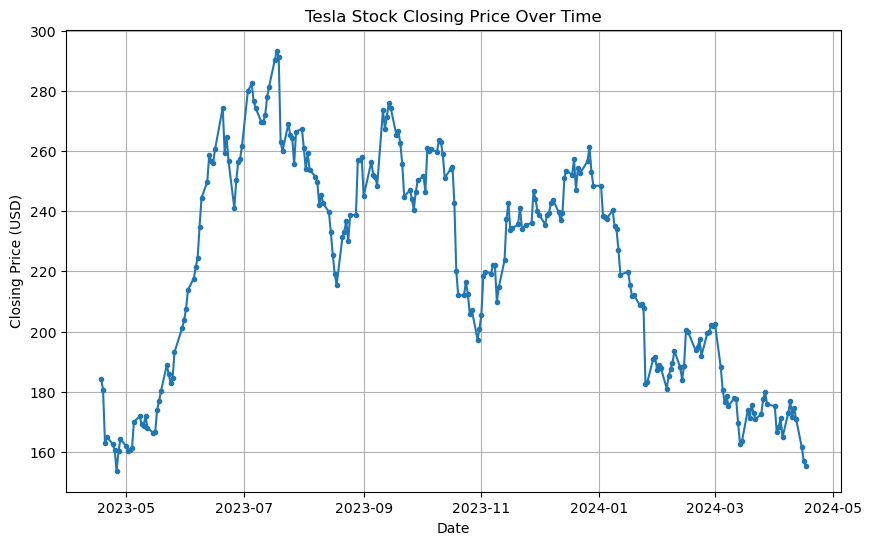

In [5]:
import matplotlib.pyplot as plt

# Plot the closing price of Tesla stock
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], marker='.')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature engineering: Let's use the 'Open', 'High', 'Low', and 'Volume' columns as features
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 5.669195427091743
R-squared: 0.9954777395603681


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

# Feature engineering
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
X = df[['Day', 'Month', 'Year']]
y = df['Close']
y.head()

0    184.309998
1    180.589996
2    162.990005
3    165.080002
4    162.550003
Name: Close, dtype: float64

In [8]:
X.head()

,Day,Month,Year
0,18,4,2023
1,19,4,2023
2,20,4,2023
3,21,4,2023
4,24,4,2023


In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1104.7364197298457


In [10]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create training data
look_back = 3
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:(i + look_back), 0])
    y.append(scaled_data[i + look_back, 0])
X, y = np.array(X), np.array(y)

# Reshape data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [12]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X, y, epochs=100, batch_size=1)

# Make predictions
inputs = scaled_data[-look_back:]
inputs = np.reshape(inputs, (1, look_back, 1))
predicted_stock_price = model.predict(inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

print(f"Predicted Tesla's stock price for the next day: {predicted_stock_price[0][0]}")

C:\Users\shraddhavasa\AppData\Local\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0596
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0055
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0055
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0066
Epoch 8/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
Epoch 9/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048
Epoch 10/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048
Epoch 11/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056
Epoch 12/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050
Epoch 13/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037
Epoch 14/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0047
Epoch 15/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1

Epoch 1/100


C:\Users\shraddhavasa\AppData\Local\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0504
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0078
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0067
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0074
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0064
Epoch 8/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 9/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0055
Epoch 10/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0049
Epoch 11/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045
Epoch 12/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056
Epoch 13/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048
Epoch 14/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036
Epoch 15/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

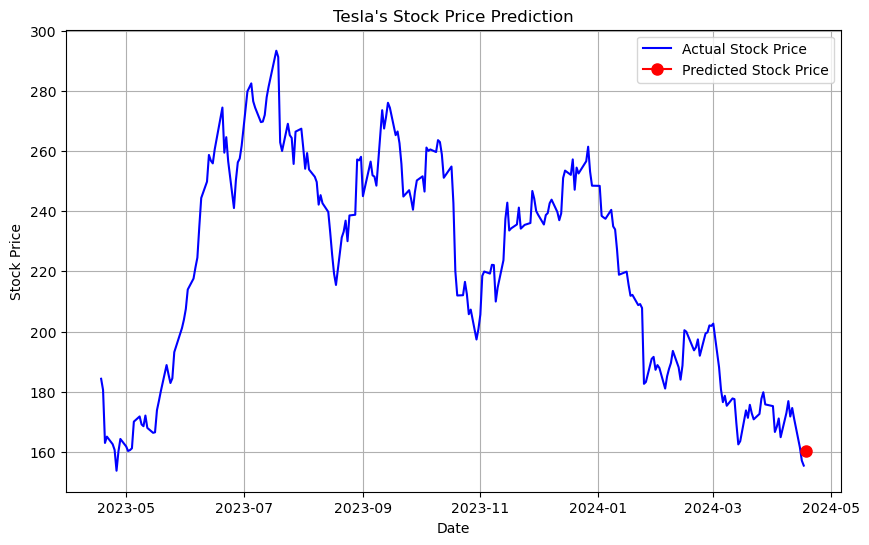

In [13]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create training data
look_back = 3
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:(i + look_back), 0])
    y.append(scaled_data[i + look_back, 0])
X, y = np.array(X), np.array(y)

# Reshape data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X, y, epochs=100, batch_size=1)

# Make predictions
inputs = scaled_data[-look_back:]
inputs = np.reshape(inputs, (1, look_back, 1))
predicted_stock_price = model.predict(inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Stock Price', color='blue')
plt.plot(df['Date'].iloc[-1] + pd.Timedelta(days=1), predicted_stock_price[0][0], marker='o', markersize=8, label='Predicted Stock Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title("Tesla's Stock Price Prediction")
plt.legend()
plt.grid(True)
plt.show()

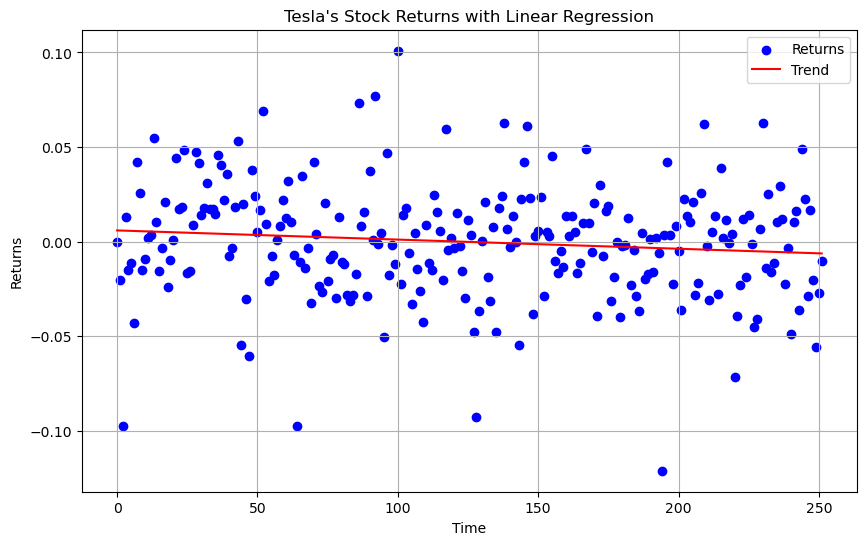

In [14]:
# Calculate returns
df['Returns'] = df['Close'].pct_change().fillna(0)

# Perform linear regression
X = np.arange(len(df)).reshape(-1, 1)
y = df['Returns'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(df)), df['Returns'], color='blue', label='Returns')
plt.plot(np.arange(len(df)), slope * np.arange(len(df)) + intercept, color='red', label='Trend')
plt.title("Tesla's Stock Returns with Linear Regression")
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print(f'Regression Slope: {slope}')
print(f'Regression Intercept: {intercept}')


Regression Slope: -4.8478478430111235e-05
Regression Intercept: 0.005866781189358642
